# Importing all libraries

In [1]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

ModuleNotFoundError: No module named 'lxml'

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 6.8MB/s eta 0:00:01     |███████████████████████         | 4.0MB 6.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

ModuleNotFoundError: No module named 'bs4'

In [2]:
pip install bs4

     |████████████████████████████████| 122kB 20.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
data.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [4]:
raw_data_selected = data[data['Borough'] != 'Not assigned']

In [6]:
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal Code'], as_index=False).agg(','.join)

In [7]:
raw_data_selected.head()

Borough Postal Code                       Neighborhood
0  Central Toronto         M4N                      Lawrence Park
1  Central Toronto         M4P                   Davisville North
2  Central Toronto         M4R  North Toronto West, Lawrence Park
3  Central Toronto         M4S                         Davisville
4  Central Toronto         M4T        Moore Park, Summerhill East

In [9]:
raw_data_selected['Neighborhood'] = np.where(raw_data_selected['Neighborhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighborhood'])

In [10]:
raw_data_selected.shape

(103, 3)

# Q2: Use the Geocoder package or the csv file to create the following dataframe

In [11]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [12]:
geospatial_data.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [26]:
geospatial_data.columns = ['Postal Code', 'Latitude', 'Longitude']

In [27]:
geospatial_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [28]:
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postal Code')

In [29]:
merged_data.head()

Borough Postal Code                       Neighborhood   Latitude  \
0  Central Toronto         M4N                      Lawrence Park  43.728020   
1  Central Toronto         M4P                   Davisville North  43.712751   
2  Central Toronto         M4R  North Toronto West, Lawrence Park  43.715383   
3  Central Toronto         M4S                         Davisville  43.704324   
4  Central Toronto         M4T        Moore Park, Summerhill East  43.689574   

   Longitude  
0 -79.388790  
1 -79.390197  
2 -79.405678  
3 -79.388790  
4 -79.383160

In [38]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [32]:
pip install shapely

     |████████████████████████████████| 1.8MB 9.8MB/s eta 0:00:01     |███████████████████████████▊    | 1.6MB 9.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install geopandas

     |████████████████████████████████| 931kB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 5.3MB/s eta 0:00:011MB/s eta 0:00:01��██████████████████████████▊ | 14.1MB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 36.2MB/s eta 0:00:01
     |████████████████████████████████| 92kB 24.6MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
Note: you may need to restart the kernel to use updated packages.


In [33]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [34]:
merged_data.head()

Borough Postal Code                       Neighborhood   Latitude  \
0  Central Toronto         M4N                      Lawrence Park  43.728020   
1  Central Toronto         M4P                   Davisville North  43.712751   
2  Central Toronto         M4R  North Toronto West, Lawrence Park  43.715383   
3  Central Toronto         M4S                         Davisville  43.704324   
4  Central Toronto         M4T        Moore Park, Summerhill East  43.689574   

   Longitude                       Coordinates  
0 -79.388790         (43.7280205, -79.3887901)  
1 -79.390197         (43.7127511, -79.3901975)  
2 -79.405678  (43.7153834, -79.40567840000001)  
3 -79.388790         (43.7043244, -79.3887901)  
4 -79.383160  (43.6895743, -79.38315990000001)

In [39]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [40]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [41]:
gdf.head()

Borough Postal Code                       Neighborhood   Latitude  \
0  Central Toronto         M4N                      Lawrence Park  43.728020   
1  Central Toronto         M4P                   Davisville North  43.712751   
2  Central Toronto         M4R  North Toronto West, Lawrence Park  43.715383   
3  Central Toronto         M4S                         Davisville  43.704324   
4  Central Toronto         M4T        Moore Park, Summerhill East  43.689574   

   Longitude                 Coordinates  
0 -79.388790  POINT (43.72802 -79.38879)  
1 -79.390197  POINT (43.71275 -79.39020)  
2 -79.405678  POINT (43.71538 -79.40568)  
3 -79.388790  POINT (43.70432 -79.38879)  
4 -79.383160  POINT (43.68957 -79.38316)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


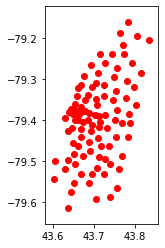

In [42]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()